In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
df = pd.read_csv('nba_all_season.csv')

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
Unnamed: 0           11145 non-null int64
Unnamed: 0.1         11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               111

In [16]:
df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)

In [23]:
df.shape

(11145, 22)

In [26]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000
oreb_pct,11145.0,0.055593,0.043889,0.000000,0.0220,0.04300,0.086000,1.00000
dreb_pct,11145.0,0.141772,0.063194,0.000000,0.0960,0.13200,0.182000,1.00000


In [51]:
num_col.dtypes

age              float64
player_height    float64
player_weight    float64
gp                 int64
pts              float64
reb              float64
ast              float64
net_rating        object
oreb_pct         float64
dreb_pct         float64
usg_pct          float64
ts_pct           float64
ast_pct          float64
best_player        int64
dtype: object

### Feature Selection

In [54]:
num_col = df.loc[:, df.dtypes != np.object]
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000
oreb_pct,11145.0,0.055593,0.043889,0.000000,0.0220,0.04300,0.086000,1.00000
dreb_pct,11145.0,0.141772,0.063194,0.000000,0.0960,0.13200,0.182000,1.00000


In [126]:
X = num_col.drop('best_player', axis = 1)
y = num_col['best_player']

[0.15694991 0.0636514  0.15056003 0.04085992 0.06779879 0.08944801
 0.09030693 0.05719266 0.05903342 0.06209201 0.05025453 0.04988406
 0.06196832]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


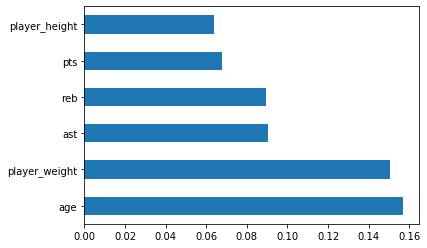

In [130]:
# Feature Importance

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(6).plot.barh()
plt.show()

In [132]:
df_feat = df[['age', 'player_weight', 'ast', 'reb', 'pts', 'player_height', 'best_player']]

In [133]:
df_feat

,age,player_weight,ast,reb,pts,player_height,best_player
0,36.0,99.790240,3.1,16.1,5.7,198.12,0
1,28.0,117.933920,0.3,1.5,2.3,215.90,0
2,39.0,95.254320,0.4,1.0,0.8,205.74,0
3,24.0,100.697424,0.6,2.3,3.7,203.20,0
4,34.0,108.862080,0.2,2.4,2.4,205.74,0
...,...,...,...,...,...,...,...
11140,28.0,108.862080,1.1,5.4,9.1,208.28,0
11141,23.0,97.522280,0.1,0.3,1.2,195.58,0
11142,28.0,117.933920,1.1,5.1,6.1,213.36,0
11143,27.0,104.779752,0.4,3.0,2.1,208.28,0


## Standardisasi

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
feat_std = df_feat.drop('best_player', axis = 1).copy()

In [136]:
feat_std.columns

Index(['age', 'player_weight', 'ast', 'reb', 'pts', 'player_height'], dtype='object')

In [137]:
for i in feat_std.columns:
    
    scale = StandardScaler()
    scale.fit(feat_std[[i]])
    
    feat_std[i] = scale.transform(feat_std[[i]])

In [138]:
df_feat_std = pd.concat([feat_std, df_feat['best_player']], axis = 1)

In [140]:
df_feat_std.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11145.0,1.333184e-15,1.000045,-2.110670,-0.729445,-0.038832,0.651781,3.874640
player_weight,11145.0,9.394808e-16,1.000045,-3.205391,-0.788779,-0.067402,0.690044,4.982236
ast,11145.0,-1.702143e-16,1.000045,-1.006482,-0.671261,-0.336039,0.334405,5.530342
reb,11145.0,3.388945e-17,1.000045,-1.426707,-0.705346,-0.224438,0.456848,5.105621
pts,11145.0,-5.350388e-16,1.000045,-1.369198,-0.779498,-0.257192,0.568389,4.713142
player_height,11145.0,7.602313e-16,1.000045,-4.438556,-0.569369,-0.016628,0.812484,3.299818
best_player,11145.0,2.009870e-02,0.140344,0.000000,0.000000,0.000000,0.000000,1.000000


## Visualisasi

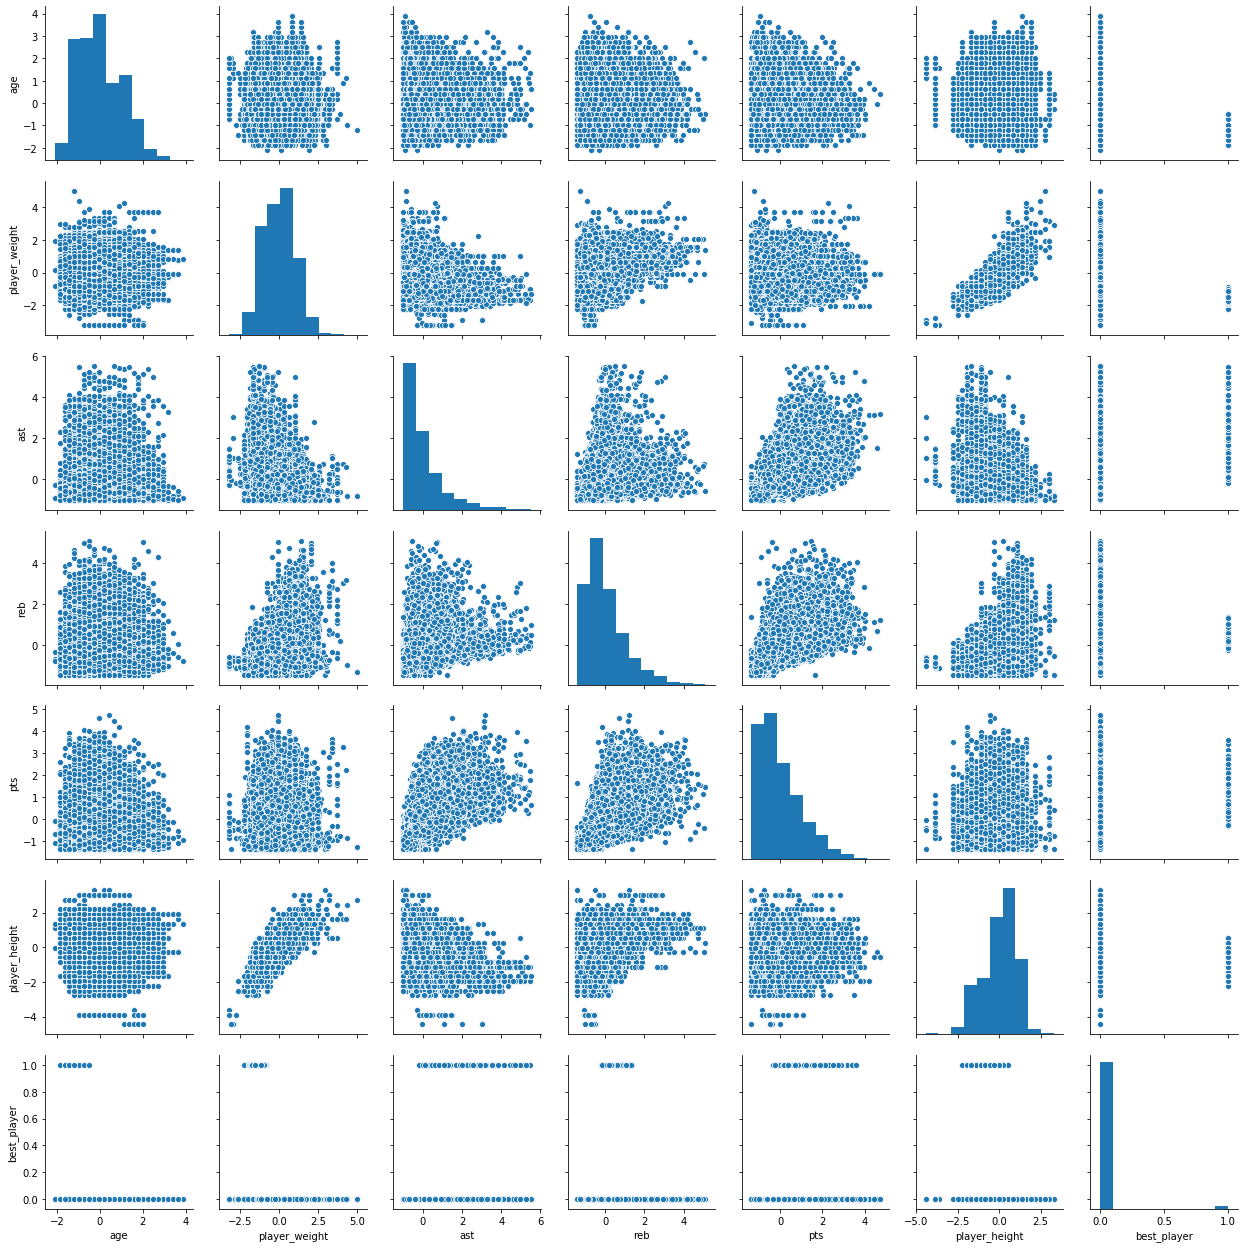

In [144]:
sns.pairplot(df_feat_std)

In [ ]:
# ada beberapa hubungan antar feature yg saya lihat dari pairplot diatas antara lain :
# pts dgn reb
# pts dgn ast
# dan sedikit hubungan antara ast dan reb

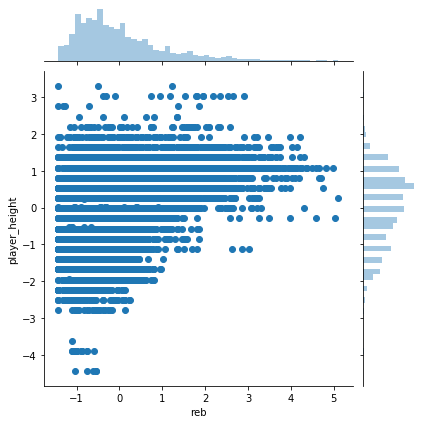

In [146]:
sns.jointplot(x = 'reb', y = 'player_height', data = df_feat_std)
# ada kecenderungan hubungan antara jumlah rebound dengan tinggi para pemain ,dengan tinggi antara 200 - 220
# memiliki jumlah rebound terbanyak, tetapi apabila terlalu tingi jumlah rebound berkurang

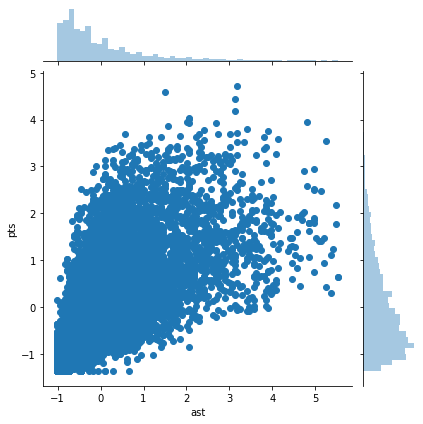

In [147]:
sns.jointplot(x = 'ast', y = 'pts', data = df_feat_std )
# ada hubungan antara jumlah assist dan point

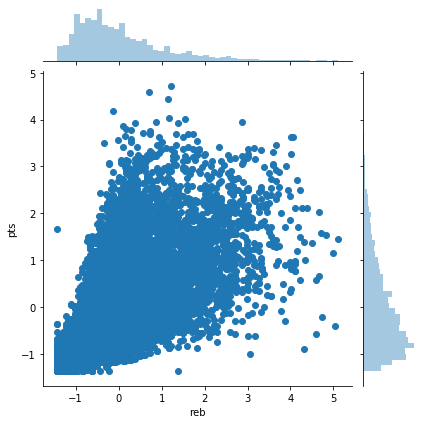

In [148]:
sns.jointplot(x = 'reb', y = 'pts', data = df_feat_std )
# ada hubungan antara jumlah rebound dan point

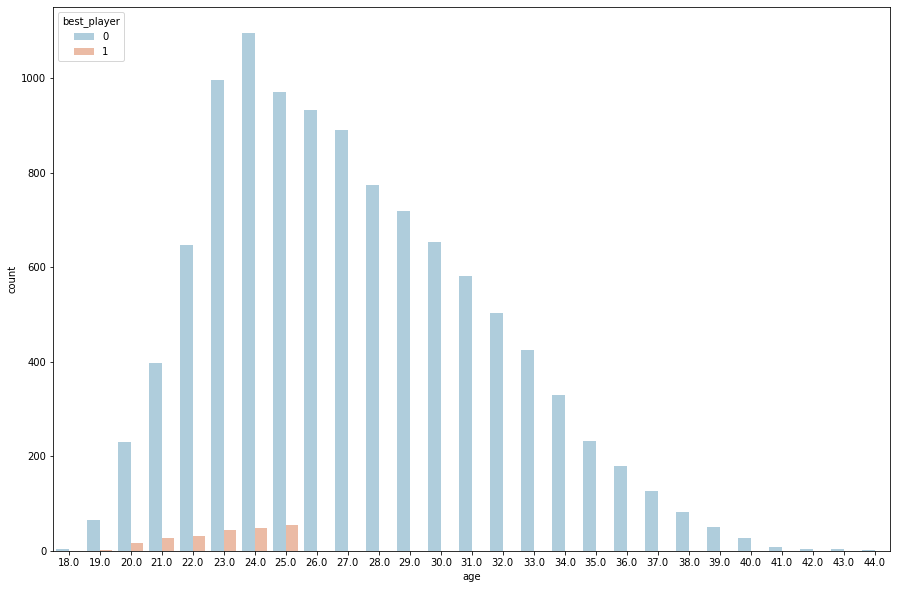

In [150]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'age', hue = 'best_player', data = df , palette = 'RdBu_r')
# rata2 pemain basket memiliki umur terbanyak 23 - 27 tahun, dengan mean pada umur 24 tahun
# pemian yang memiliki best player 1 hanya berada pd rentang usia 20 tahun - 25 tahun

## Train Test Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X = df_feat_std.drop('best_player', axis = 1)
y = df_feat_std['best_player']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 101)

## Model

In [155]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [156]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
LRmodel.score(X_test, y_test)

0.9828711256117455

In [167]:
LRpred = LRmodel.predict(X_test)

In [169]:
print(classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2403
           1       0.82      0.18      0.30        49

    accuracy                           0.98      2452
   macro avg       0.90      0.59      0.65      2452
weighted avg       0.98      0.98      0.98      2452



In [159]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [160]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [161]:
KNNmodel.score(X_test, y_test)

0.9885807504078303

In [170]:
KNNpred = KNNmodel.predict(X_test)

In [171]:
print(classification_report(y_test, KNNpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2403
           1       0.89      0.49      0.63        49

    accuracy                           0.99      2452
   macro avg       0.94      0.74      0.81      2452
weighted avg       0.99      0.99      0.99      2452



In [162]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [163]:
RFmodel = RandomForestClassifier(n_estimators = 100)
RFmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [164]:
RFmodel.score(X_test, y_test)

0.99836867862969

In [173]:
RFpred = RFmodel.predict(X_test)

In [174]:
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.92      0.96        49

    accuracy                           1.00      2452
   macro avg       1.00      0.96      0.98      2452
weighted avg       1.00      1.00      1.00      2452



In [165]:
# Compare

print(f'Log Regression Score : {LRmodel.score(X_test, y_test)}')
print(f'KNN Score : {KNNmodel.score(X_test, y_test)}')
print(f'Random Forest Score : {RFmodel.score(X_test, y_test)}')

Log Regression Score : 0.9828711256117455
KNN Score : 0.9885807504078303
Random Forest Score : 0.99836867862969


In [186]:
# Hyperparameter tuning (Log. Regression)
# Randomized Search CV
from sklearn. model_selection import RandomizedSearchCV

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000]

params = {'solver' : solver, 'max_iter' : max_iter}

modelRS = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = params, cv = 5)

In [190]:
modelRS.fit(X_train, y_train)
modelRS.best_params_

{'solver': 'newton-cg', 'max_iter': 1000}

In [191]:
LRmodel_tuned = LogisticRegression(solver = 'newton-cg', max_iter = 1000)
LRmodel_tuned.fit(X_train, y_train)
LRmodel_tuned.score(X_test, y_test)

0.9820554649265906

In [201]:
# Hyperparameter tuning (KNN)

params = {'n_neighbors' : [5,7,9,11,13,15], 'leaf_size' : [1,2,3,4,5],}

modelKNN = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions = params, cv = 5)

In [202]:
modelKNN.fit(X_train, y_train)
modelKNN.best_params_

{'n_neighbors': 11, 'leaf_size': 2}

In [216]:
KNNmodel_tuned = KNeighborsClassifier(n_neighbors = 11, leaf_size = 2)
KNNmodel_tuned.fit(X_train, y_train)
KNNmodel_tuned.score(X_test, y_test)

0.9889885807504079

In [210]:
# K Value (Elbow Method)

error_rate = []

for i in range(1,40):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

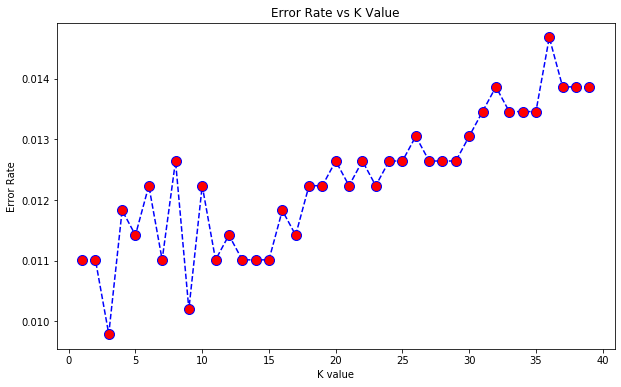

In [212]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [214]:
KNNmodel_tuned2 = KNeighborsClassifier(n_neighbors = 3, leaf_size = 2)
KNNmodel_tuned2.fit(X_train, y_train)
KNNmodel_tuned2.score(X_test, y_test)

0.9902120717781403

In [204]:
# Hyperparameter tuning (Random Forest)

params = {'criterion' : ['gini','entropy'], 'n_estimators' : [10,15,20,25,30,35,40], 'min_samples_leaf' : [1,2,3,4,5],}

modelRF = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = params, cv = 5)

In [205]:
modelRF.fit(X_train, y_train)
modelRF.best_params_

{'n_estimators': 25, 'min_samples_leaf': 1, 'criterion': 'entropy'}

In [206]:
RFmodel_tuned = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 1, criterion = 'entropy')
RFmodel_tuned.fit(X_train, y_train)
RFmodel_tuned.score(X_test, y_test)

0.99836867862969

In [218]:
# Compare
print('\n')
print('Untuned')
print(f'Log Regression Score : {LRmodel.score(X_test, y_test)}')
print(f'KNN Score : {KNNmodel.score(X_test, y_test)}')
print(f'Random Forest Score : {RFmodel.score(X_test, y_test)}')
print('\n')
print('Tuned : ')
print(f'Log Regression Score : {LRmodel_tuned.score(X_test, y_test)}')
print(f'KNN Rand. Search Grid Score : {KNNmodel_tuned.score(X_test, y_test)}')
print(f'KNN elbow method Score : {KNNmodel_tuned2.score(X_test, y_test)}')
print(f'Random Forest Score : {RFmodel_tuned.score(X_test, y_test)}')



Untuned
Log Regression Score : 0.9828711256117455
KNN Score : 0.9885807504078303
Random Forest Score : 0.99836867862969


Tuned : 
Log Regression Score : 0.9820554649265906
KNN Rand. Search Grid Score : 0.9889885807504079
KNN elbow method Score : 0.9902120717781403
Random Forest Score : 0.99836867862969


In [ ]:
## Model yg akan di compare evaluation matrix nya :
# Log. Regression Untuned
# KNN dgn elbow method
# Random Forest (tuned & untuned sama)

In [219]:
# Log. Regression

# predict
LRpred = LRmodel.predict(X_test)

# Matrix
print(classification_report(y_test, LRpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2403
           1       0.82      0.18      0.30        49

    accuracy                           0.98      2452
   macro avg       0.90      0.59      0.65      2452
weighted avg       0.98      0.98      0.98      2452



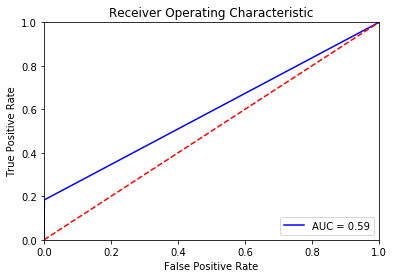

In [226]:
import sklearn.metrics as metrics

probs = LRmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, LRpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [220]:
# KNN dgn elbow method

# predict
KNNpred = KNNmodel_tuned2.predict(X_test)

# Matrix
print(classification_report(y_test, KNNpred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2403
           1       0.88      0.59      0.71        49

    accuracy                           0.99      2452
   macro avg       0.94      0.80      0.85      2452
weighted avg       0.99      0.99      0.99      2452



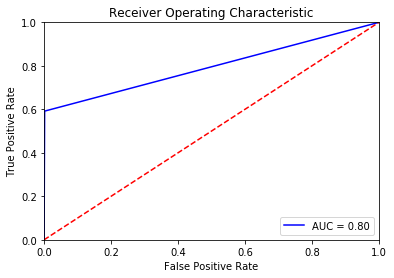

In [228]:
probs = KNNmodel_tuned2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, KNNpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [221]:
# Random Forest Tuned

# predict
RFpred = RFmodel_tuned.predict(X_test)

# Matrix
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.92      0.96        49

    accuracy                           1.00      2452
   macro avg       1.00      0.96      0.98      2452
weighted avg       1.00      1.00      1.00      2452



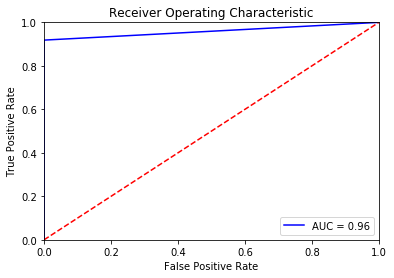

In [229]:
probs = RFmodel_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, RFpred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## saya lebih memilih untuk mengurangi probabilitas False Negative, karena saya ingin mengurangi jumlah orang yg tidak mumpuni dalam hal ini best_player = 0 untuk menjadi kandidat yang terprediksi lolos

## Oversampling 

In [239]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [233]:
df_feat_std['best_player'].value_counts()

0    10921
1      224
Name: best_player, dtype: int64

In [238]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [280]:
# Random Forest Tuned +  Over Sampling

# predict
RFmodel_tuned_OS = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 1, criterion = 'entropy')
RFmodel_tuned_OS.fit(X_resampled, y_resampled)
RFpred_OS = RFmodel_tuned_OS.predict(X_test)

# Matrix
print(classification_report(y_test, RFpred_OS))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      1.00      1.00        49

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452



In [281]:
print(confusion_matrix(y_test, RFpred_OS))

[[2403    0]
 [   0   49]]


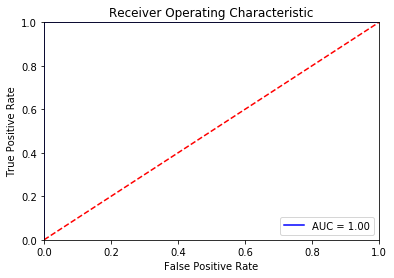

In [253]:
probs = RFmodel_tuned.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, RFpred_OS)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [251]:
# Random Forest Tuned

# predict
RFmodel_tuned.fit(X_train, y_train)
RFpred = RFmodel_tuned.predict(X_test)

# Matrix
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.98      0.99        49

    accuracy                           1.00      2452
   macro avg       1.00      0.99      0.99      2452
weighted avg       1.00      1.00      1.00      2452



In [255]:
print(confusion_matrix(y_test, RFpred))

[[2403    0]
 [   1   48]]


## Untuk no. 7 karena saya rasa model tersebut sudah memiliki score yang baik setelah di tuning. Kemudian setelah melakukan oversampling maka langsung pada tahap deploy model

## Deploy

In [290]:
df_pemain = pd.read_csv('ibl_player.csv')
df_pemain.head()

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143


In [291]:
df_pemain.drop('Unnamed: 0', axis = 1)

,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,4,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,6,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,5,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,2,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,8,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237


In [292]:
df_pemain_feat = df_pemain[['age', 'weight', 'ast', 'reb', 'pts', 'height']]

In [293]:
scaler = StandardScaler()

df_pemain_scale = scaler.fit_transform(df_pemain_feat)
df_pemain_scale

array([[ 0.63599873,  1.31632171,  0.91473203,  0.48349378,  0.14285714,
         1.32911403],
       [-0.95399809,  0.42390021,  0.91473203, -0.72524067, -0.21428571,
         0.25724788],
       [ 0.10599979, -0.24541591, -1.31632171, -0.72524067,  1.21428571,
        -1.24336474],
       [ 1.69599661, -2.0302589 ,  0.69162666, -0.32232919,  1.57142857,
         0.25724788],
       [-1.48399703, -0.91473203, -0.20079484, -1.12815215, -0.57142857,
        -0.17149859],
       [-0.95399809,  0.20079484,  1.36094278,  2.09513971, -0.92857143,
         1.54348727],
       [ 1.16599767,  1.31632171,  0.69162666,  0.0805823 ,  0.14285714,
         0.90036757],
       [ 0.10599979,  0.64700558, -1.53942708, -1.12815215, -2.        ,
        -1.02899151],
       [-0.95399809, -0.91473203, -1.09321633,  1.28931674,  0.85714286,
        -1.45773797],
       [ 0.63599873,  0.20079484, -0.42390021,  0.0805823 , -0.21428571,
        -0.38587182]])

In [298]:
df_pemain['Prediksi'] = RFmodel_tuned_OS.predict(df_pemain_scale)
df_pemain.drop('Unnamed: 0', axis = 1, inplace = True)

In [300]:
df_pemain['klasifikasi'] = df_pemain.apply(lambda x: 'T. Lolos' if (x['Prediksi'] == 0) else 'Lolos', axis=1)
df_pemain

,name,club,country,age,height,weight,pts,reb,gp,draft_year,...,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Prediksi,klasifikasi
0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,...,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,0,T. Lolos
1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,...,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277,0,T. Lolos
2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,...,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352,0,T. Lolos
3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,...,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071,0,T. Lolos
4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,...,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143,0,T. Lolos
5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,2018,...,23,2.5,9.0,0.120,0.118,0.118,0.303,0.238,0,T. Lolos
6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,2015,...,10,2.2,9.4,0.055,0.086,0.186,0.386,0.226,0,T. Lolos
7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,2018,...,11,1.2,8.4,0.018,0.129,0.029,0.429,0.189,0,T. Lolos
8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,2018,...,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220,0,T. Lolos
9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,2017,...,25,1.7,12.5,0.053,0.137,0.125,0.537,0.237,0,T. Lolos
